# python libraries

In [1]:
#Data Preprocessing libraries
import re
import string
import numpy as np 
import pandas as pd 
from bs4 import BeautifulSoup
from collections import Counter
from sklearn import preprocessing
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import WordPunctTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix

#Data files loading libraries
import os
import glob

#Data visualization libraries
import seaborn as sns
import matplotlib.cm as cm
from matplotlib import rcParams
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_confusion_matrix

#Machine learning algorithms
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

#Ignore warings of system
import warnings
warnings.filterwarnings("ignore")

# IMDB_movie_reviews_cleaning function for data Cleaning

In [2]:
plt.style.use('fivethirtyeight')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[^ ]+'
combined_pat = r'|'.join((pat1, pat2))
www_pat = r'www.[^ ]+'
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

def  IMDB_movie_reviews_cleaning(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped
    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(www_pat, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

# ----------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------

# TRAIN DATA

# Train Negative data

### Cleaning all reviews of train negitavie using IMDB_movie_reviews_cleaning function

Here is cleaning the reviews of train negitavie one by one and saving files in other directory which is Clean Data within neg folder

In [3]:
os.mkdir('./aclImdb/train/neg/Clean_Data')
Dir_Path="./aclImdb/train/neg/"
Dir_Path_for_Clean =os.listdir(Dir_Path)
lines=[]
for i in Dir_Path_for_Clean:
    if os.path.isfile(Dir_Path+i):
        with open(Dir_Path+i,"r",encoding="utf-8", errors='ignore') as filedataa:
            lines_of_single_file = filedataa.readlines()
        with open(Dir_Path+"Clean_Data/"+i,"w+") as filedir:
            for l in lines_of_single_file:
                clean_file_now = IMDB_movie_reviews_cleaning(l)            
                filedir.write(clean_file_now)

### Saving in CSV
Here calling each negative clean review file from clean data directory and saving into csv file 

In [4]:
Dir_Path_clean="./aclImdb/train/neg/Clean_Data"
Dir_Path_all = glob.glob(Dir_Path_clean+'/*.*')
for i in Dir_Path_all:
    with open(i, "rb") as data_of_files:
        data_in_lines=data_of_files.readlines()
        file=open("Train_clean_negative_reviews.csv", "a", encoding="utf8")
        file.write(str(data_in_lines))
        file.write("\n")
        file.close()

###  Giving Class negative

In [5]:
cols = ['IMDB_Reviews','Class']
file1=pd.read_csv("Train_clean_negative_reviews.csv",header=None, names=cols)
file1['Class']='negative'

### Reading first 5 reviews of train negative with given class

In [6]:
file1.head()

,IMDB_Reviews,Class
0,[b'story of man who has unnatural feelings for...,negative
1,[b'airport starts as brand new luxury plane is...,negative
2,[b'this film lacked something could not put my...,negative
3,[b'sorry everyone know this is supposed to be ...,negative
4,[b'when was little my parents took me along to...,negative


# ----------------------------------------------------------------------------------------------------

# Train Positive data

### Cleaning all reviews of train Positive using IMDB_movie_reviews_cleaning function

Here is cleaning the reviews of train Positive one by one and saving files in other directory which is Clean Data within pos folder

In [7]:
os.mkdir('./aclImdb/train/pos/Clean_Data')
Dir_Path="./aclImdb/train/pos/"
Dir_Path_for_Clean =os.listdir(Dir_Path)
lines=[]
for i in Dir_Path_for_Clean:
    if os.path.isfile(Dir_Path+i):
        with open(Dir_Path+i,"r",encoding="utf-8", errors='ignore') as filedataa:
            lines_of_single_file = filedataa.readlines()
        with open(Dir_Path+"Clean_Data/"+i,"w+") as filedir:
            for l in lines_of_single_file:
                clean_file_now = IMDB_movie_reviews_cleaning(l)            
                filedir.write(clean_file_now)

### Saving in CSV
Here calling each Positive clean review file from clean data directory and saving into csv file 

In [8]:
Dir_Path_clean="./aclImdb/train/pos/Clean_Data"
Dir_Path_all = glob.glob(Dir_Path_clean+'/*.*')
for i in Dir_Path_all:
    with open(i, "rb") as data_of_files:
        data_in_lines=data_of_files.readlines()
        file=open("Train_clean_positive_reviews.csv", "a", encoding="utf8")
        file.write(str(data_in_lines))
        file.write("\n")
        file.close()

###  Giving Class Positive

In [9]:
cols = ['IMDB_Reviews','Class']
file2=pd.read_csv("Train_clean_positive_reviews.csv",header=None, names=cols)
file2['Class']='positive'

### Reading first 5 reviews of train positive with given class

In [10]:
file2.head()

,IMDB_Reviews,Class
0,[b'bromwell high is cartoon comedy it ran at t...,positive
1,[b'homelessness or houselessness as george car...,positive
2,[b'brilliant over acting by lesley ann warren ...,positive
3,[b'this is easily the most underrated film inn...,positive
4,[b'this is not the typical mel brooks film it ...,positive


# ----------------------------------------------------------------------------------------------------

# Combining the the negative and positive reviews of train data

In [11]:
Train_neg_pos=pd.concat([file1,file2])
Train_neg_pos.shape

(25000, 2)

# ----------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------

# TEST DATA

# Test Negative data

### Cleaning all reviews of Test negitavie using IMDB_movie_reviews_cleaning function

Here is cleaning the reviews of Test negitavie one by one and saving files in other directory which is Clean Data within neg folder

In [12]:
os.mkdir('./aclImdb/test/neg/Clean_Data')
Dir_Path="./aclImdb/test/neg/"
Dir_Path_for_Clean =os.listdir(Dir_Path)
lines=[]
for i in Dir_Path_for_Clean:
    if os.path.isfile(Dir_Path+i):
        with open(Dir_Path+i,"r",encoding="utf-8", errors='ignore') as filedataa:
            lines_of_single_file = filedataa.readlines()
        with open(Dir_Path+"Clean_Data/"+i,"w+") as filedir:
            for l in lines_of_single_file:
                clean_file_now = IMDB_movie_reviews_cleaning(l)            
                filedir.write(clean_file_now)

### Saving in CSV
Here calling each negative clean review file from clean data directory and saving into csv file 

In [13]:
Dir_Path_clean="./aclImdb/test/neg/Clean_Data"
Dir_Path_all = glob.glob(Dir_Path_clean+'/*.*')
for i in Dir_Path_all:
    with open(i, "rb") as data_of_files:
        data_in_lines=data_of_files.readlines()
        file=open("Test_clean_negative_reviews.csv", "a", encoding="utf8")
        file.write(str(data_in_lines))
        file.write("\n")
        file.close()

###  Giving Class negative

In [14]:
cols = ['IMDB_Reviews','Class']
file3=pd.read_csv("Test_clean_negative_reviews.csv",header=None, names=cols)
file3['Class']='negative'

### Reading first 5 reviews of test negative with given class

In [15]:
file3.head()

,IMDB_Reviews,Class
0,[b'once again mr costner has dragged out movie...,negative
1,[b'this is an example of why the majority of a...,negative
2,[b'first of all hate those moronic rappers who...,negative
3,[b'not even the beatles could write songs ever...,negative
4,[b'brass pictures movies is not fitting word f...,negative


# ----------------------------------------------------------------------------------------------------

# Test Positive data

### Cleaning all reviews of test Positive using IMDB_movie_reviews_cleaning function

Here is cleaning the reviews of test Positive one by one and saving files in other directory which is Clean Data within pos folder

In [16]:
os.mkdir('./aclImdb/test/pos/Clean_Data')
Dir_Path="./aclImdb/test/pos/"
Dir_Path_for_Clean =os.listdir(Dir_Path)
lines=[]
for i in Dir_Path_for_Clean:
    if os.path.isfile(Dir_Path+i):
        with open(Dir_Path+i,"r",encoding="utf-8", errors='ignore') as filedataa:
            lines_of_single_file = filedataa.readlines()
        with open(Dir_Path+"Clean_Data/"+i,"w+") as filedir:
            for l in lines_of_single_file:
                clean_file_now = IMDB_movie_reviews_cleaning(l)            
                filedir.write(clean_file_now)

### Saving in CSV
Here calling each Positive clean review file from clean data directory and saving into csv file 

In [17]:
Dir_Path_clean="./aclImdb/test/pos/Clean_Data"
Dir_Path_all = glob.glob(Dir_Path_clean+'/*.*')
for i in Dir_Path_all:
    with open(i, "rb") as data_of_files:
        data_in_lines=data_of_files.readlines()
        file=open("Test_clean_positive_reviews.csv", "a", encoding="utf8")
        file.write(str(data_in_lines))
        file.write("\n")
        file.close()

###  Giving Class Positive

In [18]:
cols = ['IMDB_Reviews','Class']
file4=pd.read_csv("Test_clean_positive_reviews.csv",header=None, names=cols)
file4['Class']='positive'

### Reading first 5 reviews of test positive with given class

In [19]:
file4.head()

,IMDB_Reviews,Class
0,[b'went and saw this movie last night after be...,positive
1,[b'actor turned director bill paxton follows u...,positive
2,[b'as recreational golfer with some knowledge ...,positive
3,[b'saw this film in sneak preview and it is de...,positive
4,[b'bill paxton has taken the true story of the...,positive


# ----------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------

# Combining the the negative and positive reviews of test data

In [20]:
Test_neg_pos=pd.concat([file3,file4])
Test_neg_pos.shape

(25000, 2)

# ----------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------

# Combining Train and Test data for the data analysis and Feature Extraction

In [21]:
Train_Test=pd.concat([Train_neg_pos,Test_neg_pos])
Train_Test.shape

(50000, 2)

# ----------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------

# ----------------------------------------------------------------------------------------------------

# Data Analysis, Preprocessing and Features Extraction

### Lenght of data

In [22]:
len(Train_Test)

50000

### Reviews text in lower case

In [23]:
Train_Test['IMDB_Reviews']=Train_Test['IMDB_Reviews'].str.lower()

In [24]:
Train_Test['IMDB_Reviews'].head()

0    [b'story of man who has unnatural feelings for...
1    [b'airport starts as brand new luxury plane is...
2    [b'this film lacked something could not put my...
3    [b'sorry everyone know this is supposed to be ...
4    [b'when was little my parents took me along to...
Name: IMDB_Reviews, dtype: object

### all columns

In [25]:
Train_Test.columns

Index(['IMDB_Reviews', 'Class'], dtype='object')

### Unique Reviews labels

In [26]:
Train_Test['Class'].unique()

array(['negative', 'positive'], dtype=object)

### data types of all columns

In [27]:
Train_Test.dtypes

IMDB_Reviews    object
Class           object
dtype: object

### Checking Null values

In [28]:
Train_Test[Train_Test.isnull().any(axis=1)]

,IMDB_Reviews,Class


### Count of Null values

In [29]:
np.sum(Train_Test.isnull().any(axis=1))

0

### Data information

In [30]:
Train_Test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 12499
Data columns (total 2 columns):
IMDB_Reviews    50000 non-null object
Class           50000 non-null object
dtypes: object(2)
memory usage: 1.1+ MB


### Frequency Distribution of Class data

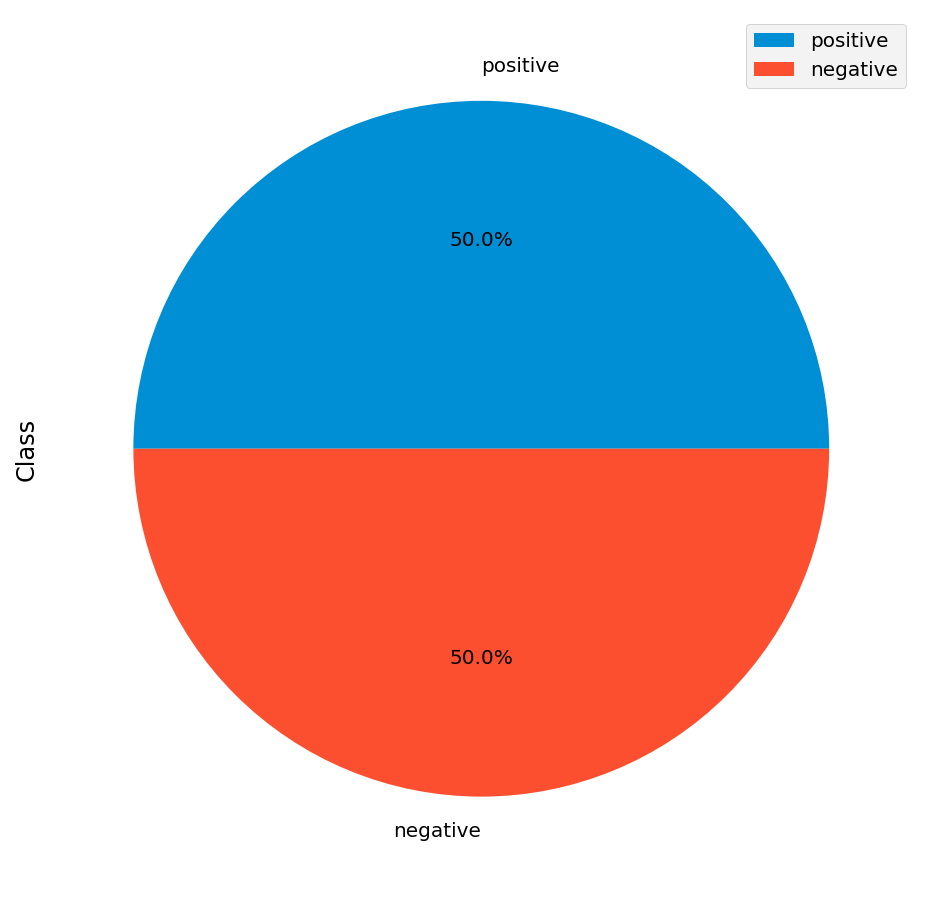

In [31]:
Train_Test['Class'].value_counts().head(3).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

In [32]:
Train_Test['Class'].value_counts()

positive    25000
negative    25000
Name: Class, dtype: int64

### Getting Tokenization of Reviews

In [33]:
tokenizer = RegexpTokenizer(r'\w+')
Train_Test['IMDB_Reviews'] = Train_Test['IMDB_Reviews'].apply(tokenizer.tokenize)

In [34]:
Train_Test['IMDB_Reviews'].head()

0    [b, story, of, man, who, has, unnatural, feeli...
1    [b, airport, starts, as, brand, new, luxury, p...
2    [b, this, film, lacked, something, could, not,...
3    [b, sorry, everyone, know, this, is, supposed,...
4    [b, when, was, little, my, parents, took, me, ...
Name: IMDB_Reviews, dtype: object

### Stop words of english

In [35]:
stopwords_list = stopwords.words('english')

In [36]:
len(stopwords_list)

179

### Removing Stops words from reviews

In [37]:
Train_Test['IMDB_Reviews']=Train_Test['IMDB_Reviews'].apply(lambda x: [item for item in x if item not in stopwords_list])

In [38]:
Train_Test['IMDB_Reviews'].head()

0    [b, story, man, unnatural, feelings, pig, star...
1    [b, airport, starts, brand, new, luxury, plane...
2    [b, film, lacked, something, could, put, finge...
3    [b, sorry, everyone, know, supposed, art, film...
4    [b, little, parents, took, along, theater, see...
Name: IMDB_Reviews, dtype: object

### Description of text information

In [39]:
all_words = [word for tokens in Train_Test['IMDB_Reviews'] for word in tokens]
sentence_lengths = [len(tokens) for tokens in Train_Test['IMDB_Reviews']]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

5944616 words total, with a vocabulary size of 101070
Max sentence length is 1401


### Top 20 words in Reviews text

In [40]:
counter = Counter(all_words)

In [41]:
counter.most_common(20)

[('movie', 87931),
 ('film', 79673),
 ('one', 53585),
 ('b', 50000),
 ('like', 40156),
 ('good', 29736),
 ('would', 26677),
 ('time', 25099),
 ('even', 24854),
 ('story', 23110),
 ('really', 23090),
 ('see', 23020),
 ('well', 21260),
 ('much', 19316),
 ('could', 18581),
 ('bad', 18459),
 ('get', 18415),
 ('people', 18181),
 ('great', 18137),
 ('also', 17972)]

In [42]:
counted_words = Counter(all_words)

words = []
counts = []
for letter, count in counted_words.most_common(25):
    words.append(letter)
    counts.append(count)

<BarContainer object of 25 artists>

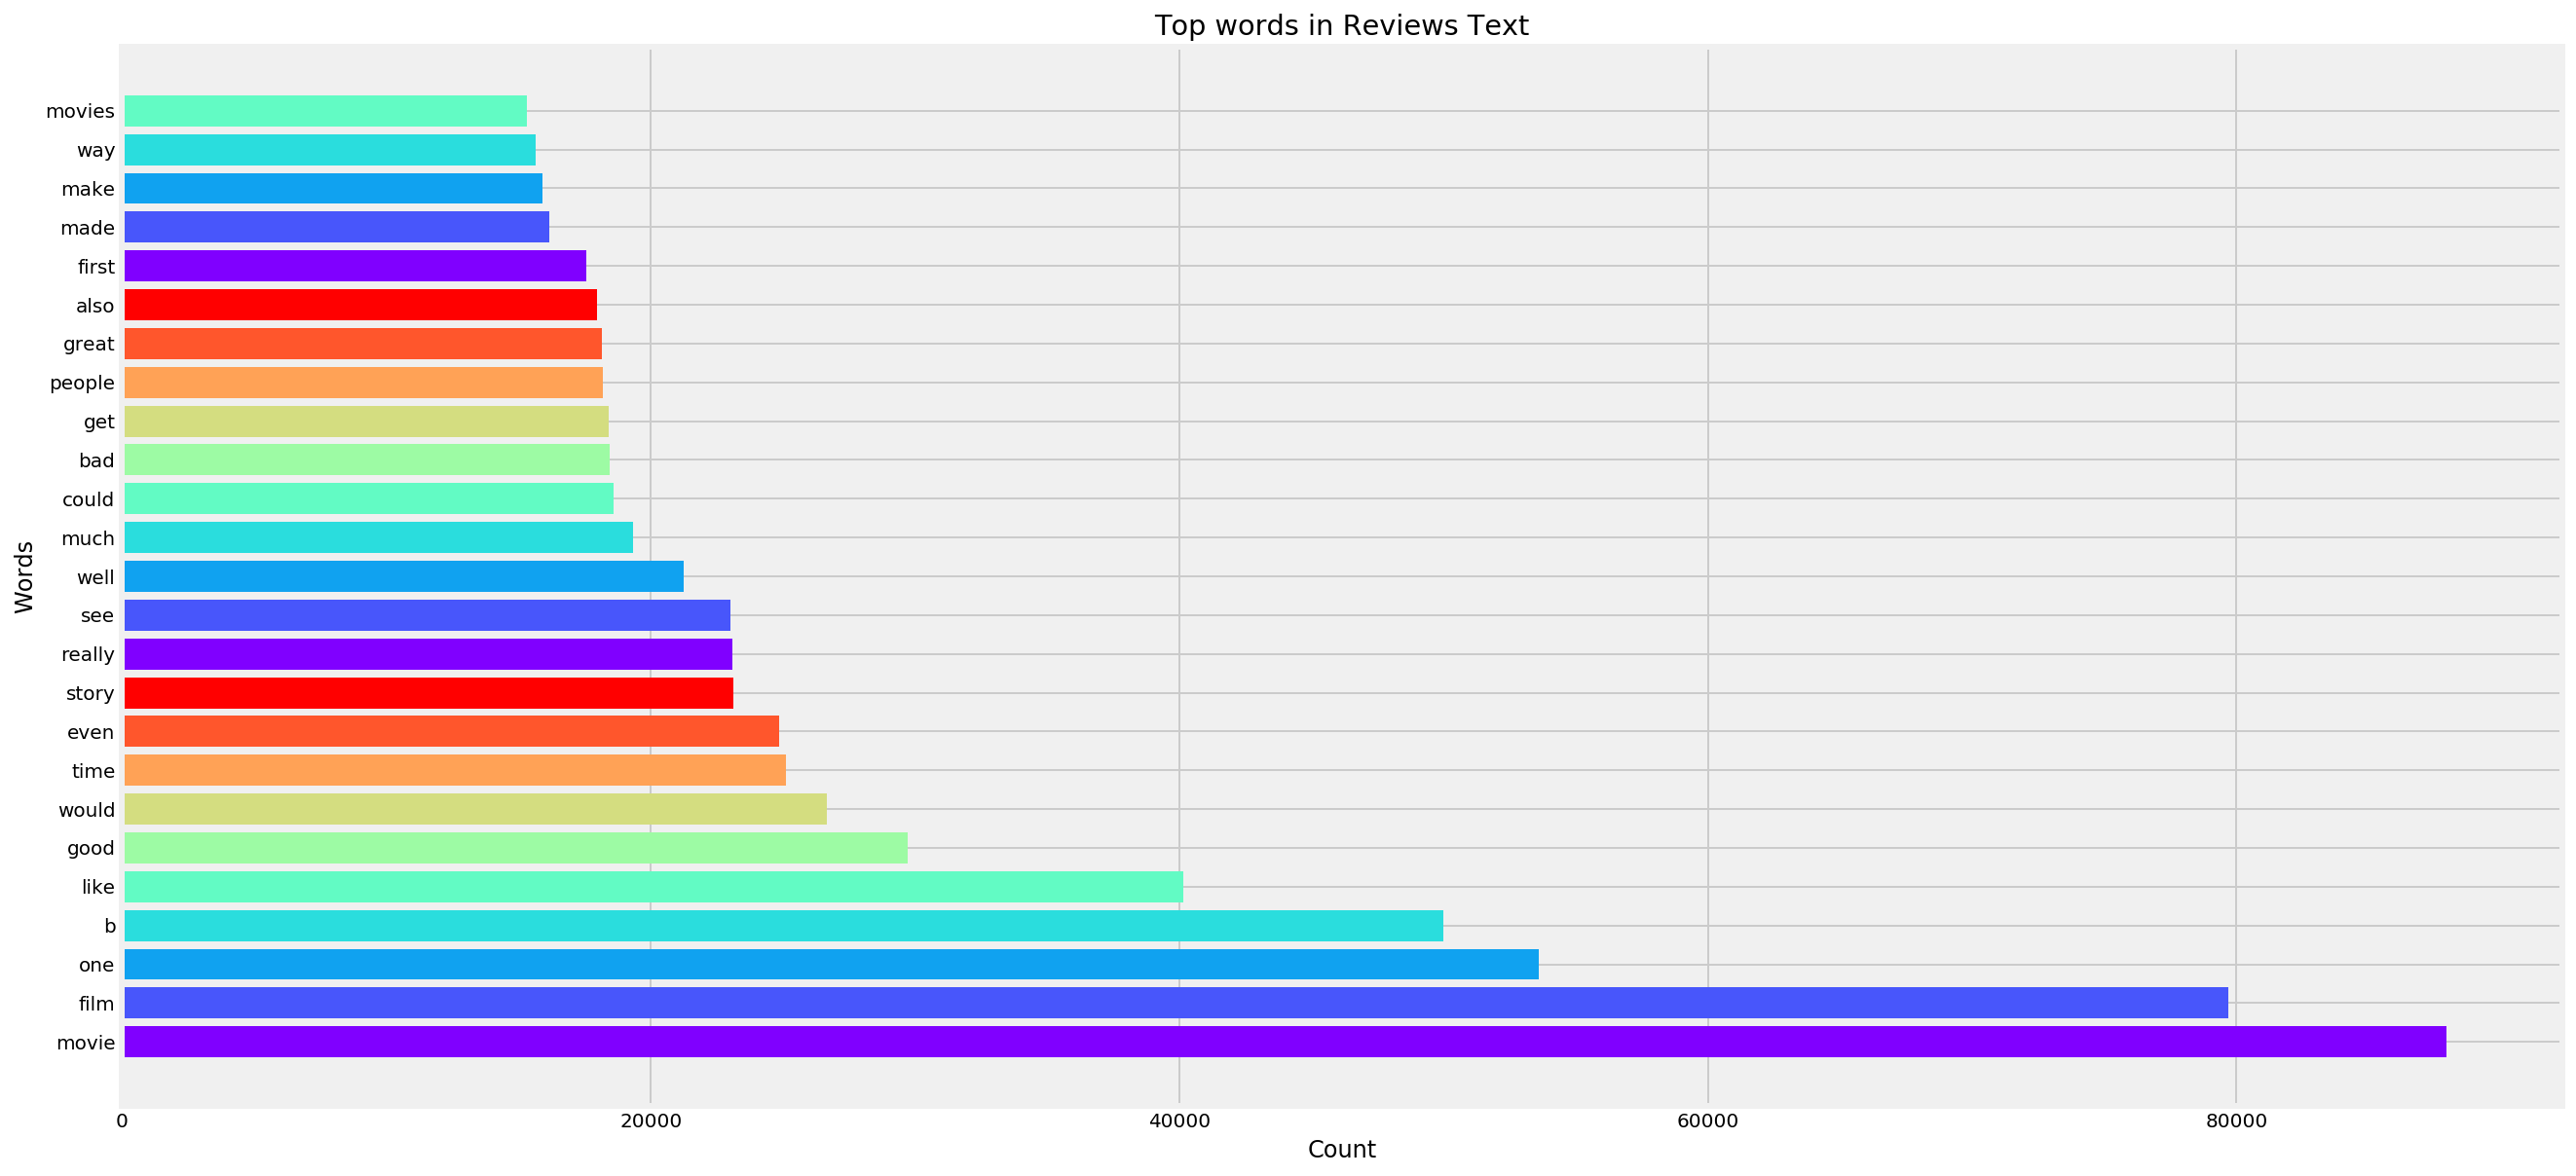

In [43]:
colors = cm.rainbow(np.linspace(0, 1, 10))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in Reviews Text')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

### Word cloud of Positive Class

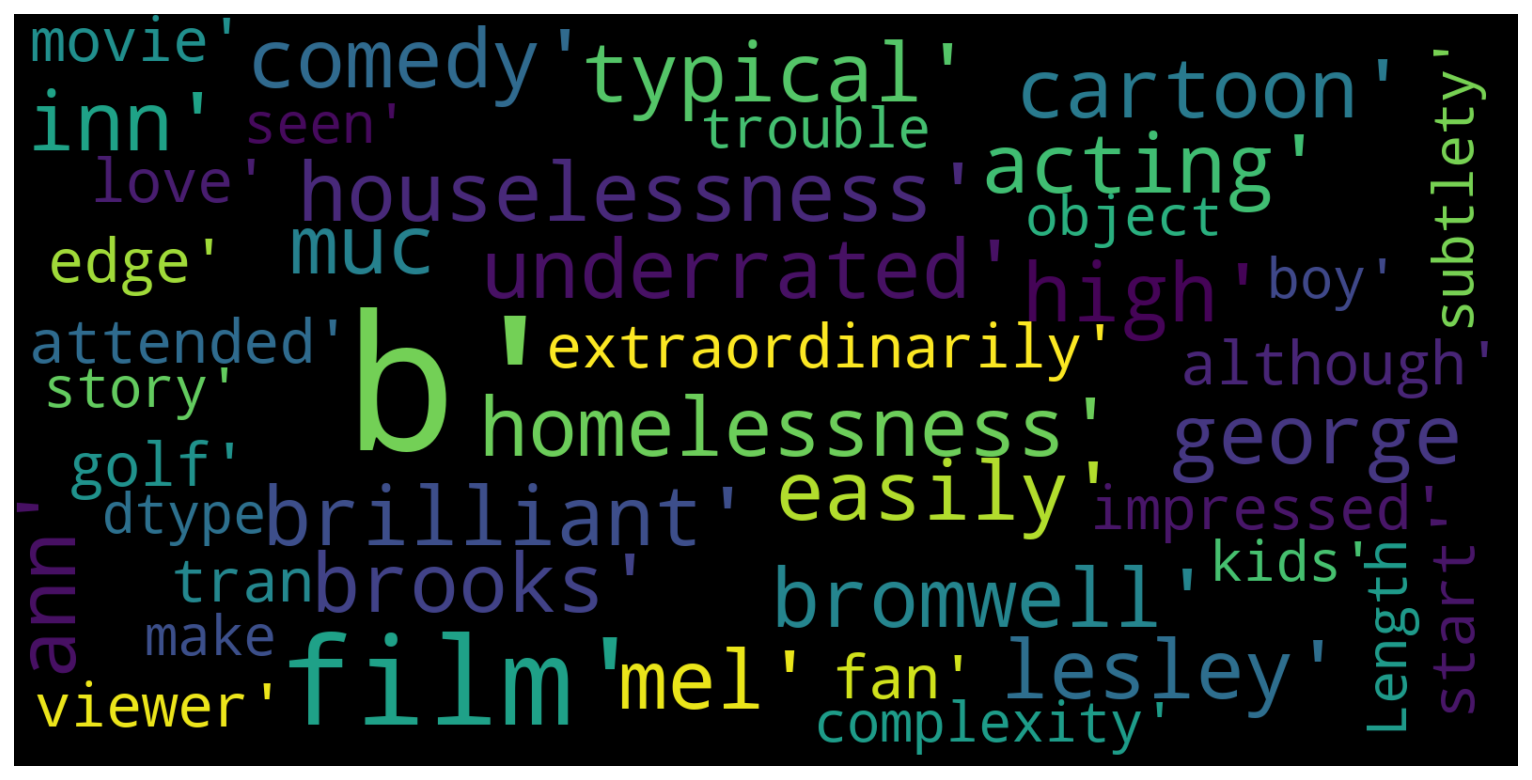

In [44]:
Train_Test1=Train_Test[Train_Test['Class']=='positive']
neg =Train_Test1['IMDB_Reviews']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pd.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Word cloud of Negative Class

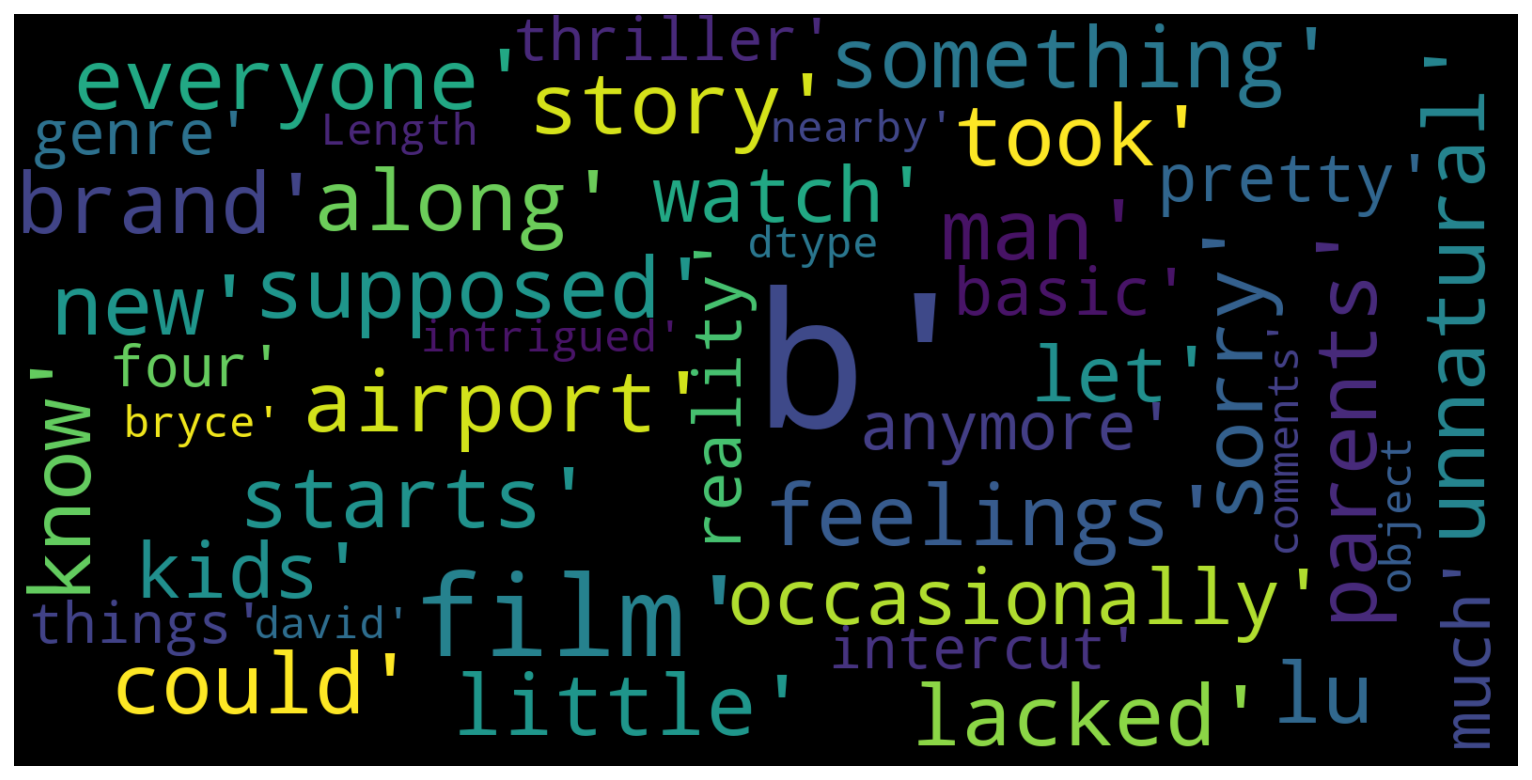

In [45]:
Train_Test1=Train_Test[Train_Test['Class']=='negative']
neg =Train_Test1['IMDB_Reviews']
neg_string = []
for t in neg:
    neg_string.append(t)
neg_string = pd.Series(neg_string).map(str)
neg_string=str(neg_string)


wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### Features Extraction From the Reviews Text

In [46]:
word_vectorizer = TfidfVectorizer(
    sublinear_tf=True,
    strip_accents='unicode',
    analyzer='word',
    token_pattern=r'\w{1,}',
    stop_words='english',
    ngram_range=(1, 1),
    max_features =1000)

### Preparing features for training and testing

In [47]:
unigramdataGet= word_vectorizer.fit_transform(Train_Test['IMDB_Reviews'].astype('str'))
unigramdataGet = unigramdataGet.toarray()
vocab = word_vectorizer.get_feature_names()
unigramdata=pd.DataFrame(np.round(unigramdataGet, 1), columns=vocab)
unigramdata[unigramdata>0] = 1
unigramdata.head()

,ability,able,absolutely,accent,act,acted,acting,action,actor,actors,...,wrong,wrote,yeah,year,years,yes,york,young,younger,zombie
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### First 100 words of vocab

In [48]:
print('Vocab Lenght ', len(vocab))

Vocab Lenght  1000


### Deleteing the Reviews column because we have been extracted features from this

In [49]:
Train_Test.reset_index(drop=True, inplace=True)
Train_Test=Train_Test.drop(columns='IMDB_Reviews')

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Now Spliting data of Train and Test Accordingly for Training and Testing of Machine Learning Algorithms

In [50]:
X_train, X_test, y_train, y_test = train_test_split(unigramdata, Train_Test['Class'], test_size=0.50)

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# --------------------------Traning Machine Learning Algorithms----------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Training SVM Support Vector Machine Algorithm

In [51]:
svc=LinearSVC(C=1, max_iter=500)
svc= svc.fit(X_train , y_train)
svc

LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=500,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

# -------------------------------------------------------------------------------------------------------------

# Training Naive Bayes Algorithm

In [52]:
nab=GaussianNB(var_smoothing=1e-08)
nab= nab.fit(X_train , y_train)
nab

GaussianNB(priors=None, var_smoothing=1e-08)

# -------------------------------------------------------------------------------------------------------------

# Training Logistic Regression Algorithm

In [53]:
lor=LogisticRegression(C=2, max_iter=100)
lor= lor.fit(X_train , y_train)
lor

LogisticRegression(C=2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# -------------------------------------------------------------------------------------------------------------

# Training Random Forest Algorithm

In [54]:
raf=RandomForestClassifier(min_samples_leaf=20, min_samples_split=20,random_state=100)
raf= raf.fit(X_train , y_train)
raf

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# ------------------Test Machine Learning Algorithms on test data-----------------------

# -------------------------------------------------------------------------------------------------------------

# Testing the Trained  SVM Support Vector Machine Algorithm

### Accuracy

In [55]:
y_pred1 = svc.predict(X_test)
dm=svc.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(svc.score(X_test, y_test)))

Accuracy score= 0.85


### Precision, Recall, F1

In [56]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.86      0.84      0.85     12535
    positive       0.84      0.87      0.85     12465

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000





### Confusion Matrix



confusion matrix


[[10539  1996]
 [ 1670 10795]]




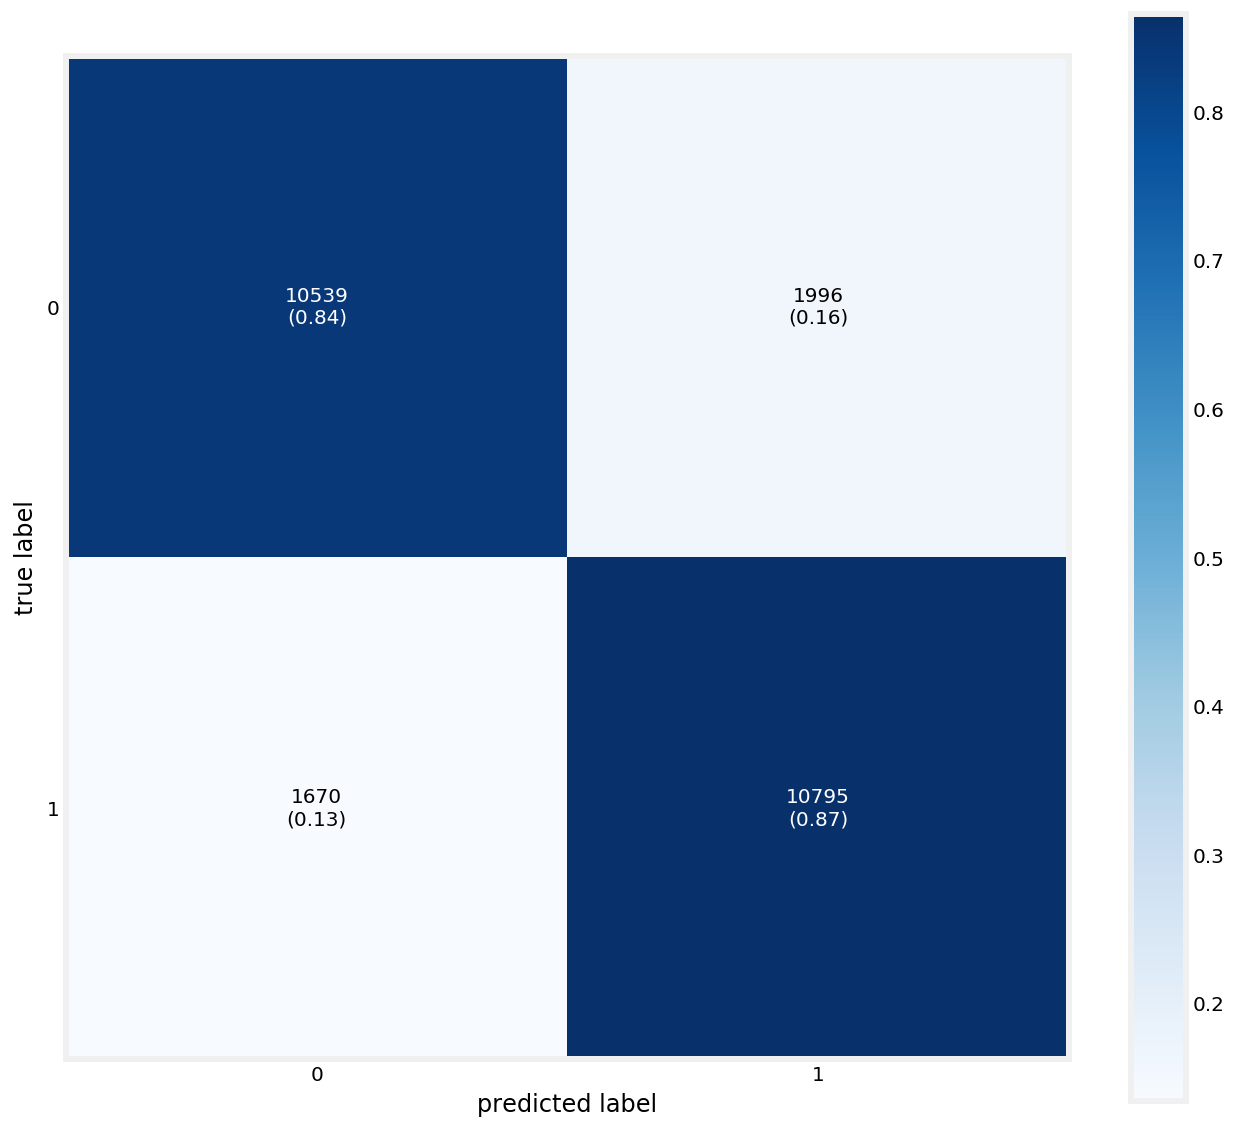

In [57]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# Testing the Trained  Naive Bayes Algorithm

### Accuracy

In [58]:
y_pred1 = nab.predict(X_test)
nb=nab.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(nab.score(X_test, y_test)))

Accuracy score= 0.82


### Precision, Recall, F1

In [59]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.83      0.81      0.82     12535
    positive       0.81      0.83      0.82     12465

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000





### Confusion Matrix



confusion matrix


[[10148  2387]
 [ 2073 10392]]




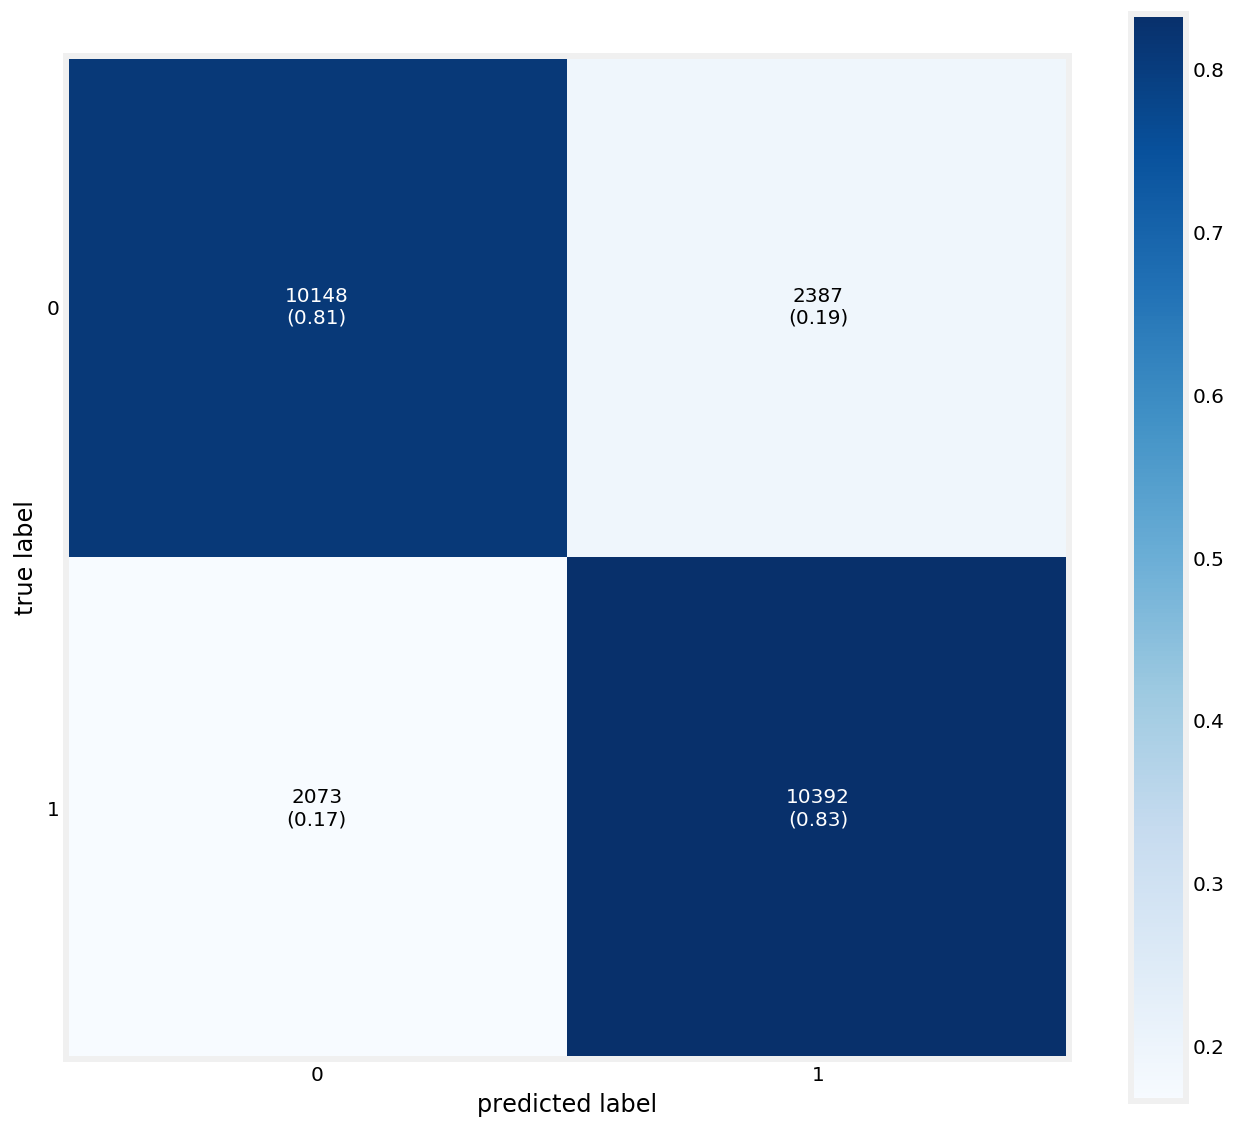

In [60]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# Testing the Trained  Logistic Regression Algorithm

### Accuracy

In [61]:
y_pred1 = lor.predict(X_test)
lr=lor.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(lor.score(X_test, y_test)))

Accuracy score= 0.85


### Precision, Recall, F1

In [62]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.86      0.84      0.85     12535
    positive       0.84      0.87      0.85     12465

    accuracy                           0.85     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.85      0.85      0.85     25000





### Confusion Matrix



confusion matrix


[[10535  2000]
 [ 1672 10793]]




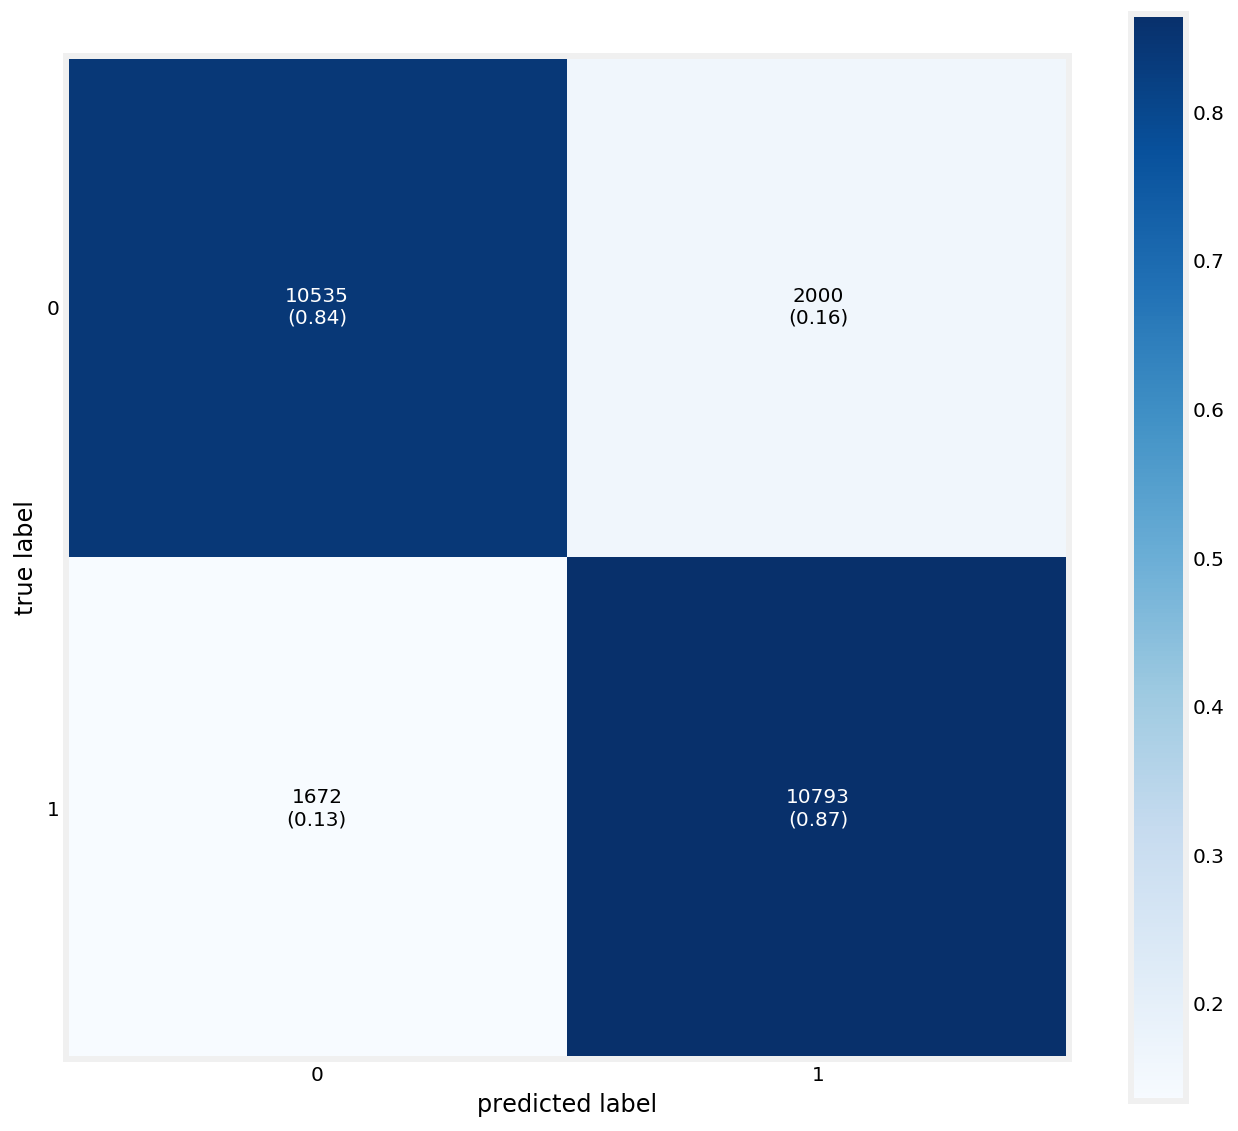

In [63]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# Testing the Trained Random Forest Algorithm

### Accuracy

In [64]:
y_pred1 = raf.predict(X_test)
rf=raf.score(X_test, y_test)
print('Accuracy score= {:.2f}'.format(raf.score(X_test, y_test)))

Accuracy score= 0.82


### Precision, Recall, F1

In [65]:
print('\n')
print("Precision, Recall, F1")
print('\n')
CR=classification_report(y_test, y_pred1)
print(CR)
print('\n')



Precision, Recall, F1


              precision    recall  f1-score   support

    negative       0.83      0.79      0.81     12535
    positive       0.80      0.84      0.82     12465

    accuracy                           0.82     25000
   macro avg       0.82      0.82      0.82     25000
weighted avg       0.82      0.82      0.82     25000





### Confusion Matrix



confusion matrix


[[ 9961  2574]
 [ 1985 10480]]




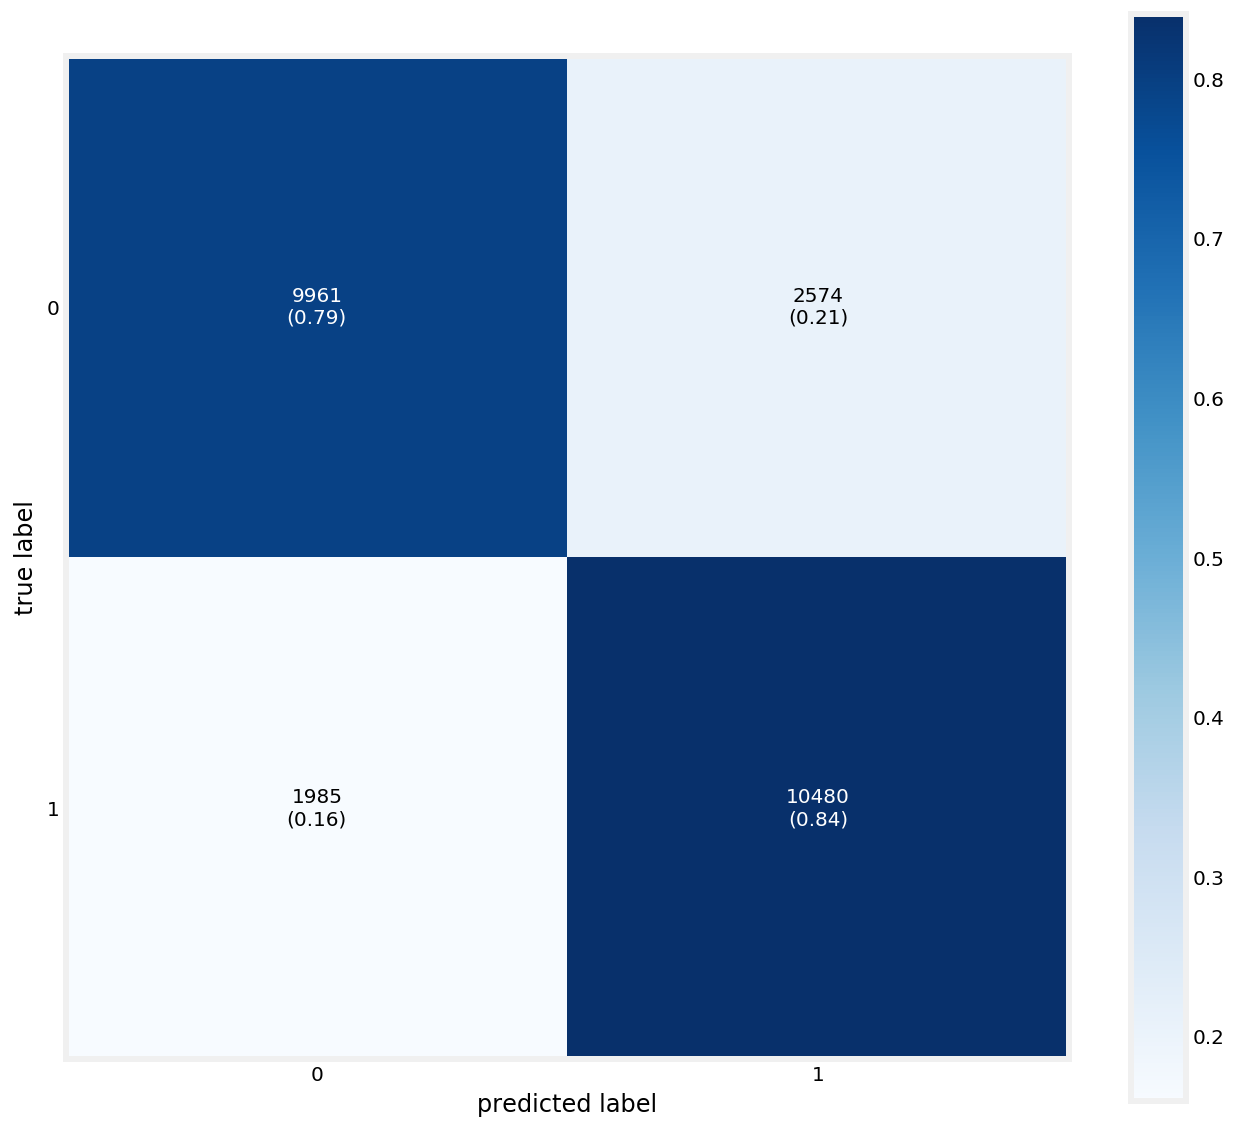

In [66]:
print('\n')
print("confusion matrix")
print('\n')
CR=confusion_matrix(y_test, y_pred1)
print(CR)
print('\n')

fig, ax = plot_confusion_matrix(conf_mat=CR,figsize=(10, 10),
                                show_absolute=True,
                                show_normed=True,
                                colorbar=True)
plt.show()

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# -------------------------------------------------------------------------------------------------------------

# Comparison of all algorithms Results

In [67]:
from prettytable import PrettyTable
x = PrettyTable()
print('\n')
print("Comparison of all algorithm results")
x.field_names = ["Model", "Accuracy"]


x.add_row(["SVM Algorithm", round(dm,2)])
x.add_row(["Naive Bayes Algorithm", round(nb,2)])
x.add_row(["LogisticRegression Algorithm", round(lr,2)])
x.add_row(["Random Forest Algorithm", round(rf,2)])

print(x)
print('\n')



Comparison of all algorithm results
+------------------------------+----------+
|            Model             | Accuracy |
+------------------------------+----------+
|        SVM Algorithm         |   0.85   |
|    Naive Bayes Algorithm     |   0.82   |
| LogisticRegression Algorithm |   0.85   |
|   Random Forest Algorithm    |   0.82   |
+------------------------------+----------+




# Best Model is Logistic Regression because of accuracy and Converge very fast at training time

In [68]:
x = PrettyTable()
print('\n')
print("Best Model.")
x.field_names = ["Model", "Accuracy"]
x.add_row(["LogisticRegression Algorithm",round(lr,2)])
print(x)
print('\n')



Best Model.
+------------------------------+----------+
|            Model             | Accuracy |
+------------------------------+----------+
| LogisticRegression Algorithm |   0.85   |
+------------------------------+----------+


